**Problema del quiosquero** 

Un quiosquero vende periodico a 1.10 euros cada uno. Cada periodico le cuesta 0.90 euros.Las ventas de periódicos del quiosquero a partir de su experiencia se refleja en la tablas siguiente.

 |**periodico**|**40**|**40**|**50**|**60**|**70**|
 |-------------|------|------|------|------|------|
 |f(x)         | 20%  | 25%  | 25%  | 20%  | 10%  |

Teniendo en cuenta el costo de 0.20 euros por venta perdida y 0.10 euros por el reciclaje de cada periodico no vendido, determine el beneficio promedio diario si pide 50 periodicos cada dia.

Solución mediante simulación (**Metodología de la Simulación**)
1. Identifique las variables.
 
 x= número de periodicos vendidos

2. Determine la distribución de probabilidad de cada variable

|**periodico**|**40**|**40**|**50**|**60**|**70**|
|-------------|------|------|------|------|------|
|f(x)         | 20%  | 25%  | 25%  | 20%  | 10%  |
|f(x)         | 0.2  | 0.25 | 0.25 | 0.2  | 0.1  |


3. Enumere la distribución acumulada de probabilidad de cada variable.

|**periodico**|**40**|**40**|**50**|**60**|**70**|
|-------------|------|------|------|------|------|
|f(x)         | 20%  | 25%  | 25%  | 20%  | 10%  |
|f(x)         | 0.2  | 0.25 | 0.25 | 0.2  | 0.1  |
|F(x)         | 0.2  | 0.45 | 0.70 | 0.90 | 1    |


4. Establezca el intervalo de números aleatorios correspondiente a cada valor de cada una de las variables.

|**periodico**|**40**|**40**|**50**|**60**|**70**|
|-------------|------|------|------|------|------|
|f(x)         | 20%  | 25%  | 25%  | 20%  | 10%  |
|f(x)         | 0.2  | 0.25 | 0.25 | 0.2  | 0.1  |
|F(x)         | 0.2  | 0.45 | 0.70 | 0.90 | 1    |
|Intervalos   |(0,0.19)|(0.2,0.44)|(0.45,0.69)|(0.7,0.89)|(0.9,1)|

5. Genere números aleatorios.


In [2]:
import random
u = random.random()
print(u)

0.9978985831138675


6. Simule las ventas de un dia y calcule el beneficio.

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def ventas_sim():
    ventas=0
    u = random.random()
    if 0.0 <= u < 0.20:
        ventas = 30
    elif 0.20 <= u < 0.45:
        ventas = 40
    elif 0.45 <= u < 0.70:
        ventas = 50
    elif 0.70 <= u < 0.90:
        ventas = 60
    elif 0.90 <= u <= 1.00:
        ventas = 70
    return ventas

In [5]:
def beneficio(pedido):
    ben = 0
    ventas_reales = 0
    ventas_perdidas = 0
    no_vendidos = 0
    vs = ventas_sim()
    
    if vs > pedido:
        ventas_reales = pedido
        ventas_perdidas = vs - pedido
        no_vendidos = 0
        
    else:
        ventas_reales = vs
        ventas_perdidas = 0
        no_vendidos = pedido - ventas_reales
    
    ben = 1.10*ventas_reales - 0.90*pedido - 0.10*no_vendidos - 0.20*ventas_perdidas
    return ben

In [11]:
beneficio(50)

6.000000000000007

7. Obtenga la gráfica de estabilización que indica que el tamaño de muestra utilizado es suficiente para garantizar la convergencia del resultado.

In [12]:
def simulacion(n):
    L=[]
    benef = 0
    for i in range(n):
        benef += beneficio(50)
        L.append(benef/(i+1))
    return L

In [13]:
X=simulacion(500)

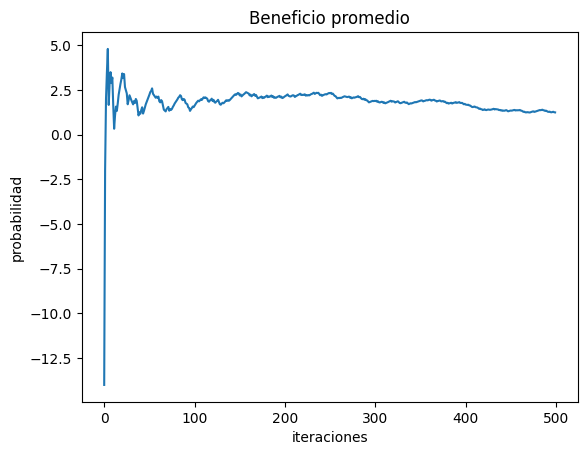

In [16]:
plt.plot(X)
plt.title('Beneficio promedio')
plt.xlabel('iteraciones') 
plt.ylabel('probabilidad') 
plt.show() 

8. Replique el modelo.

In [18]:
def modelo(n):
    lista=[]
    for i in range(n):
        s = simulacion(500)
        lista.append(np.mean(s))
    return lista

In [19]:
Y=modelo(40)

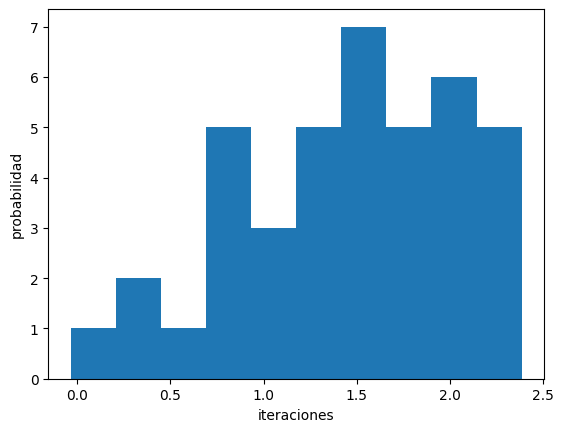

In [20]:
plt.hist(Y)
plt.xlabel('iteraciones') 
plt.ylabel('probabilidad') 
plt.show()

9. Calcule el beneficio promedio y su desviación estándar.

In [21]:
print(np.mean(Y), np.std(Y))

1.44194562738183 0.6137307041752543


10. Halle el intervalo de confianza del beneficio promedio con un nivel de confianza del  95% .

In [22]:
np.mean(Y) - 1.96*np.std(Y)/np.sqrt(50), np.mean(Y) + 1.96*np.std(Y)/np.sqrt(50)

(1.2718281554259008, 1.6120630993377594)

# Analiticamente 
Con los datos proporcionados generamos numeros aleatorios y caculamos el beneficio con la siguiente formula:

Beneficio= (precio unitario de venta X ventas reales) - (coste unitario de adquisicion X pedido) - (coste unitario de reciclaje X periodico no vendido) - (coste de venta perdida X ventas perdidas)

sabiendo que ...

Si ventas simuladas > pedido
ventas reales = pedido
ventas perdidas =ventas simuladas - pedido
periodicos no vendidos = 0

Si ventas simuladas <= pedido
ventas reales = ventas simuladas
ventas perdidas = 0
periodicos no vendidos = pedido - ventas reales

Obtenemos la siguiente tabla:


|**Dia**|**numeros aleatorios**|**ventas simuladas**|**ventas reales**|**ventas perdidas**|**periodicos no vendidos**|**beneficio €**|**beneficio promedio €**|
|-------|--------|-----|-----|-----|----|-----|----|
|    1  |  0.23  | 40  | 40  |   0 | 10 | -2  | -2 |
|    2  |  0.63  | 50  | 50  |   0 | 0  |  10 |  4 |
|    3  | 0.96   | 70  | 50  |   20| 0  |   6 |  4.6 |
|    4  | 0.80   | 60  | 50  |   10| 0  |   8 |  5.5 |
|    5  | 0.35   | 40  | 40  |   0| 10  |  -2 |  4 |
|    6  | 0.47   | 50  | 40  |   0| 0  |   10 |  5 |
|    7  | 0.27   | 40  | 40  |   0| 10  |   -2 |  4 |
|    8  | 0.29   | 40  | 50  |   0| 10  |   -2 |  3.25 |
|    9  | 0.99   | 70  | 50  |   20| 0  |  6 |  3.55 |
|   10  | 0.16   | 30  | 30  |   0| 20  |  -14|  1.8 |

En conclusion el benefecio promedio que se espara es de 1.8


